In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [5]:
DF = pd.read_excel('data/data8.xls')

In [6]:
# Percent of rented properties
DF['pctrnths'] = DF['rnthsg'] / DF['tothsg'] * 100

# Normalise features
DF['pop_scaled'] = (DF['pop'] - DF['pop'].mean()) / DF['pop'].std()
DF['pctstu_scaled'] = (DF['pctstu'] - DF['pctstu'].mean()) / DF['pctstu'].std()
DF['pctrnths_scaled'] = (DF['pctrnths'] - DF['pctrnths'].mean()) / DF['pctrnths'].std()
DF['avginc_scaled'] = (DF['avginc'] - DF['avginc'].mean()) / DF['avginc'].std()
DF['rent_scaled'] = (DF['rent'] - DF['rent'].mean()) / DF['rent'].std()

In [7]:
# Divide data for 80s and 90s
DF80 = DF[DF['year'] == 80]
DF90 = DF[DF['year'] == 90]

X80 = DF80[['pop_scaled', 'pctstu_scaled', 'pctrnths_scaled', 'avginc_scaled']]
y80 = DF80['rent']



X90 = DF90[['pop_scaled', 'pctstu_scaled', 'pctrnths_scaled', 'avginc_scaled']]
y90 = DF90['rent']

In [8]:
# Predict rent using 'pop', 'pctstu', 'pctrnths', 'avginc' feautures using Euclidean distance
def get_knn_rent_prediction(df, target, k):
    result = df.copy()
    result['dist'] = np.sqrt(
        (result['pop_scaled'] - target['pop_scaled']) ** 2 +
        (result['pctstu_scaled'] - target['pctstu_scaled']) ** 2 +
        (result['pctrnths_scaled'] - target['pctrnths_scaled']) ** 2 +
        (result['avginc_scaled'] - target['avginc_scaled']) ** 2
    )
    return result.sort_values(by='dist').iloc[1:k + 1]['rent'].mean()

In [9]:
def mean_square_error(prediction, actual):
    return np.mean((prediction - actual) ** 2)

In [10]:
def mean_absolute_error(prediction, actual):
    return np.mean(np.abs(prediction - actual))

In [11]:
def calculate_errors_for_knn(k):
    DF80['pred'] = DF80.apply(lambda x: get_knn_rent_prediction(DF80, x, k), axis=1)
    DF90['pred'] = DF90.apply(lambda x: get_knn_rent_prediction(DF90, x, k), axis=1)
    print("For k =", k)
    MSE_80 = mean_square_error(DF80['pred'], DF80['rent'])
    MAE_80 = mean_square_error(DF90['pred'], DF90['rent'])
    MSE_90 = mean_absolute_error(DF80['pred'], DF80['rent'])
    MAE_90 = mean_absolute_error(DF90['pred'], DF90['rent'])
    print("MSE for 80s: ", MSE_80)
    print("MSE for 90s: ", MAE_80)
    print("MAE for 80s: ", MSE_90)
    print("MAE for 90s: ", MAE_90)

In [12]:
# Experiment with different k values
for k in range(1, 10):
    calculate_errors_for_knn(k)

For k = 1
MSE for 80s:  1123.328125
MSE for 90s:  7784.65625
MAE for 80s:  22.515625
MAE for 90s:  56.5
For k = 2
MSE for 80s:  1547.8828125
MSE for 90s:  7225.515625
MAE for 80s:  24.15625
MAE for 90s:  55.453125
For k = 3
MSE for 80s:  1518.6302083333335
MSE for 90s:  6765.368055555555
MAE for 80s:  23.796875
MAE for 90s:  52.82291666666667
For k = 4
MSE for 80s:  1635.421875
MSE for 90s:  6516.6572265625
MAE for 80s:  23.90625
MAE for 90s:  50.57421875
For k = 5
MSE for 80s:  1685.7475000000002
MSE for 90s:  7162.996875000001
MAE for 80s:  24.125000000000004
MAE for 90s:  53.33437500000001
For k = 6
MSE for 80s:  1679.046875
MSE for 90s:  6911.506076388889
MAE for 80s:  23.786458333333336
MAE for 90s:  52.505208333333336
For k = 7
MSE for 80s:  1716.4639668367347
MSE for 90s:  6970.433035714284
MAE for 80s:  24.569196428571427
MAE for 90s:  53.1875
For k = 8
MSE for 80s:  1587.22900390625
MSE for 90s:  7245.0634765625
MAE for 80s:  23.9453125
MAE for 90s:  53.01171875
For k = 9
MSE 

In [13]:
MSE_80 = 0
MSE_90 = 0
MAE_80 = 0
MAE_90 = 0
    
k_values = np.arange(1, 10)

# Perform LOOCV for each k
for k in k_values:
    MSE_80 = 0
    MSE_90 = 0
    MAE_80 = 0
    MAE_90 = 0

    # Perform LOOCV for 80
    for i in range(len(X80)):
        target = X80.iloc[i]
        y_train = np.delete(y80.values, i, axis=0)

        knn = DF80.apply(lambda x: get_knn_rent_prediction(DF80, x, k), axis=1)
        MSE_80 += mean_square_error(y80.iloc[i], knn.iloc[i])
        MAE_80 += mean_absolute_error(y80.iloc[i], knn.iloc[i])

    # Perform LOOCV for 90
    for i in range(len(X90)):
        target = X90.iloc[i]
        y_train = np.delete(y90.values, i, axis=0)

        knn = DF90.apply(lambda x: get_knn_rent_prediction(DF90, x, k), axis=1)
        MSE_90 += mean_square_error(y90.iloc[i], knn.iloc[i])
        MAE_90 += mean_absolute_error(y90.iloc[i], knn.iloc[i])

    # Calculate average MSE and MAE
    avg_mse_80s = MSE_80 / len(X80)
    avg_mse_90s = MSE_90 / len(X90)
    avg_mae_80s = MAE_80 / len(X80)
    avg_mae_90s = MAE_90 / len(X90)

    # Print results 
    print(f"For k = {k}")
    print(f"Average MSE for 80s: {avg_mse_80s}")
    print(f"Average MSE for 90s: {avg_mse_90s}")
    print(f"Average MAE for 80s: {avg_mae_80s}")
    print(f"Average MAE for 90s: {avg_mae_90s}")
    print()


For k = 1
Average MSE for 80s: 1123.328125
Average MSE for 90s: 7784.65625
Average MAE for 80s: 22.515625
Average MAE for 90s: 56.5

For k = 2
Average MSE for 80s: 1547.8828125
Average MSE for 90s: 7225.515625
Average MAE for 80s: 24.15625
Average MAE for 90s: 55.453125

For k = 3
Average MSE for 80s: 1518.6302083333323
Average MSE for 90s: 6765.368055555556
Average MAE for 80s: 23.796875000000007
Average MAE for 90s: 52.82291666666666

For k = 4
Average MSE for 80s: 1635.421875
Average MSE for 90s: 6516.6572265625
Average MAE for 80s: 23.90625
Average MAE for 90s: 50.57421875

For k = 5
Average MSE for 80s: 1685.7475
Average MSE for 90s: 7162.996875000002
Average MAE for 80s: 24.124999999999993
Average MAE for 90s: 53.334375

For k = 6
Average MSE for 80s: 1679.0468749999995
Average MSE for 90s: 6911.506076388886
Average MAE for 80s: 23.786458333333336
Average MAE for 90s: 52.50520833333333

For k = 7
Average MSE for 80s: 1716.4639668367354
Average MSE for 90s: 6970.433035714288
Avera

In [14]:
# Define the number of folds (k)
num_folds = 5
random_seed = 4

for k in range(1, 10):
    MSE_80 = 0
    MSE_90 = 0
    MAE_80 = 0
    MAE_90 = 0
    
    for fold in range(num_folds):
        # Set seed for reproducibility
        np.random.seed(random_seed + fold)

        # Shuffle indices for random splitting
        indices_80 = np.random.permutation(len(X80))
        indices_90 = np.random.permutation(len(X90))


    # Split data into folds manually for 80s
    fold_size_80 = len(X80) // num_folds
    for i in range(num_folds):
        start_idx = i * fold_size_80
        end_idx = (i + 1) * fold_size_80
        test_indices = indices_80[start_idx:end_idx]

        train_indices = np.concatenate([indices_80[:start_idx], indices_80[end_idx:]])

        X_train, X_test = X80.iloc[train_indices], X80.iloc[test_indices]
        y_train, y_test = y80.iloc[train_indices], y80.iloc[test_indices]

        knn = DF80.apply(lambda x: get_knn_rent_prediction(DF80, x, k), axis=1)
        knn = knn.iloc[test_indices]
        MSE_80 += mean_square_error(y_test, knn)
        MAE_80 += mean_absolute_error(y_test, knn)

    # Split data into folds manually for 90s
    fold_size_90 = len(X90) // num_folds
    for i in range(num_folds):
        start_idx = i * fold_size_90
        end_idx = (i + 1) * fold_size_90
        test_indices = indices_90[start_idx:end_idx]

        train_indices = np.concatenate([indices_90[:start_idx], indices_90[end_idx:]])

        X_train, X_test = X90.iloc[train_indices], X90.iloc[test_indices]
        y_train, y_test = y90.iloc[train_indices], y90.iloc[test_indices]

        knn = DF90.apply(lambda x: get_knn_rent_prediction(DF90, x, k), axis=1)
        knn = knn.iloc[test_indices]
        MSE_90 += mean_square_error(y_test, knn)
        MAE_90 += mean_absolute_error(y_test, knn)

    # Calculate average MSE and MAE
    avg_MSE_80s = MSE_80 / num_folds
    avg_MSE_90s = MSE_90 / num_folds
    avg_MAE_80s = MAE_80 / num_folds
    avg_MAE_90s = MAE_90 / num_folds

    #result
    print(f"For k = {k}")
    print(f"Average MSE for 80s: {avg_MSE_80s}")
    print(f"Average MSE for 90s: {avg_MSE_90s}")
    print(f"Average MAE for 80s: {avg_MAE_80s}")
    print(f"Average MAE for 90s: {avg_MAE_90s}")
    print()

For k = 1
Average MSE for 80s: 1151.3333333333333
Average MSE for 90s: 7950.333333333334
Average MAE for 80s: 22.466666666666665
Average MAE for 90s: 56.03333333333334

For k = 2
Average MSE for 80s: 1591.1208333333334
Average MSE for 90s: 7402.9000000000015
Average MAE for 80s: 23.958333333333332
Average MAE for 90s: 56.0

For k = 3
Average MSE for 80s: 1582.5444444444445
Average MSE for 90s: 6871.383333333333
Average MAE for 80s: 23.922222222222224
Average MAE for 90s: 53.216666666666676

For k = 4
Average MSE for 80s: 1710.2520833333335
Average MSE for 90s: 6623.479166666667
Average MAE for 80s: 24.116666666666664
Average MAE for 90s: 51.075

For k = 5
Average MSE for 80s: 1745.3593333333333
Average MSE for 90s: 7327.552666666667
Average MAE for 80s: 23.943333333333335
Average MAE for 90s: 54.07000000000001

For k = 6
Average MSE for 80s: 1745.026388888889
Average MSE for 90s: 7098.579166666667
Average MAE for 80s: 23.669444444444444
Average MAE for 90s: 53.108333333333334

For k = 

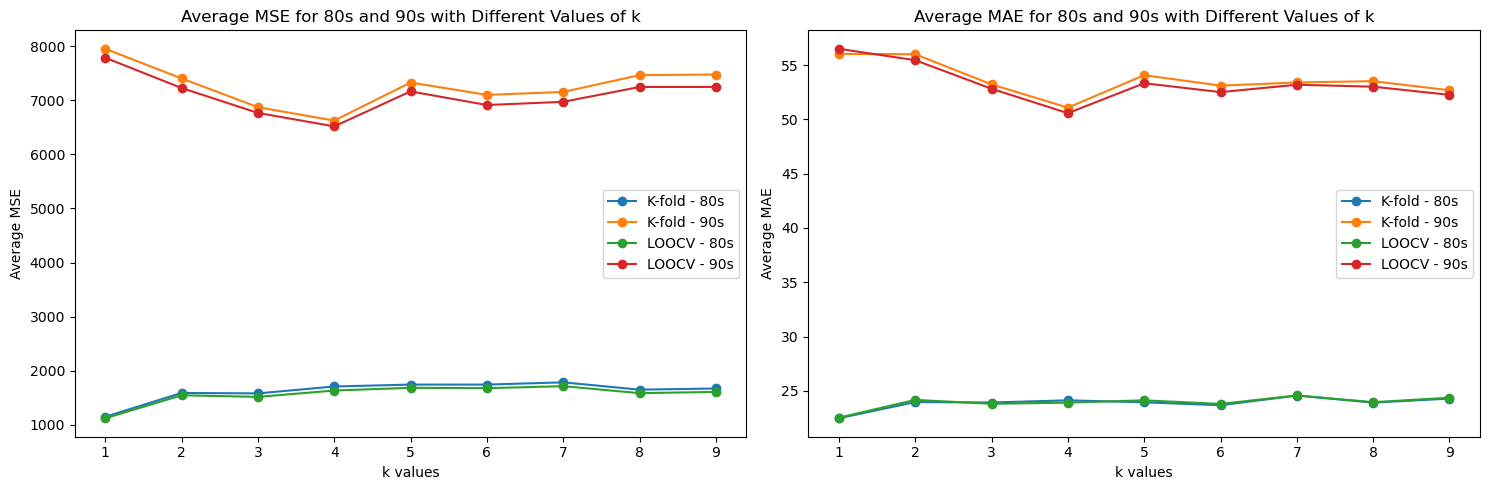

In [15]:
# Values for K-fold
k_values = list(range(1, 10))
avg_MSE_80s_kfold = [1151.33, 1591.12, 1582.54, 1710.25, 1745.36, 1745.03, 1786.95, 1651.53, 1673.11]
avg_MSE_90s_kfold = [7950.33, 7402.90, 6871.38, 6623.48, 7327.55, 7098.58, 7153.36, 7463.20, 7475.08]
avg_MAE_80s_kfold = [22.47, 23.96, 23.92, 24.12, 23.94, 23.67, 24.56, 23.91, 24.28]
avg_MAE_90s_kfold = [56.03, 56.00, 53.22, 51.08, 54.07, 53.11, 53.40, 53.52, 52.68]

# Values for LOOCV
avg_MSE_80s_loocv = [1123.33, 1547.88, 1518.63, 1635.42, 1685.75, 1679.05, 1716.46, 1587.23, 1609.92]
avg_MSE_90s_loocv = [7784.66, 7225.52, 6765.37, 6516.66, 7162.99, 6911.51, 6970.43, 7245.06, 7246.05]
avg_MAE_80s_loocv = [22.52, 24.16, 23.80, 23.91, 24.12, 23.79, 24.57, 23.95, 24.36]
avg_MAE_90s_loocv = [56.50, 55.45, 52.82, 50.57, 53.33, 52.51, 53.19, 53.01, 52.26]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(k_values, avg_MSE_80s_kfold, marker='o', label='K-fold - 80s')
ax1.plot(k_values, avg_MSE_90s_kfold, marker='o', label='K-fold - 90s')
ax1.plot(k_values, avg_MSE_80s_loocv, marker='o', label='LOOCV - 80s')
ax1.plot(k_values, avg_MSE_90s_loocv, marker='o', label='LOOCV - 90s')
ax1.set_title('Average MSE for 80s and 90s with Different Values of k')
ax1.set_xlabel('k values')
ax1.set_ylabel('Average MSE')
ax1.legend()

ax2.plot(k_values, avg_MAE_80s_kfold, marker='o', label='K-fold - 80s')
ax2.plot(k_values, avg_MAE_90s_kfold, marker='o', label='K-fold - 90s')
ax2.plot(k_values, avg_MAE_80s_loocv, marker='o', label='LOOCV - 80s')
ax2.plot(k_values, avg_MAE_90s_loocv, marker='o', label='LOOCV - 90s')
ax2.set_title('Average MAE for 80s and 90s with Different Values of k')
ax2.set_xlabel('k values')
ax2.set_ylabel('Average MAE')
ax2.legend()

plt.tight_layout()
plt.show()

For k = 1
Training Set:
Average MSE for 80s: 5655.1461538461535
Average MSE for 90s: 38865.234615384616
Average MAE for 80s: 112.88461538461536
Average MAE for 90s: 282.34999999999997
Validation Set:
Average MSE for 80s: 5449.783333333333
Average MSE for 90s: 39174.816666666666
Average MAE for 80s: 111.24999999999997
Average MAE for 90s: 283.15
For k = 2
Training Set:
Average MSE for 80s: 7822.310576923078
Average MSE for 90s: 36588.37788461538
Average MAE for 80s: 121.14807692307696
Average MAE for 90s: 279.0211538461539
Validation Set:
Average MSE for 80s: 7380.195833333334
Average MSE for 90s: 34130.779166666674
Average MAE for 80s: 119.19166666666669
Average MAE for 90s: 269.6583333333334
For k = 3
Training Set:
Average MSE for 80s: 7693.552991452991
Average MSE for 90s: 34241.00641025641
Average MAE for 80s: 119.34102564102564
Average MAE for 90s: 265.3192307692308
Validation Set:
Average MSE for 80s: 7158.075925925927
Average MSE for 90s: 32032.120370370365
Average MAE for 80s: 1

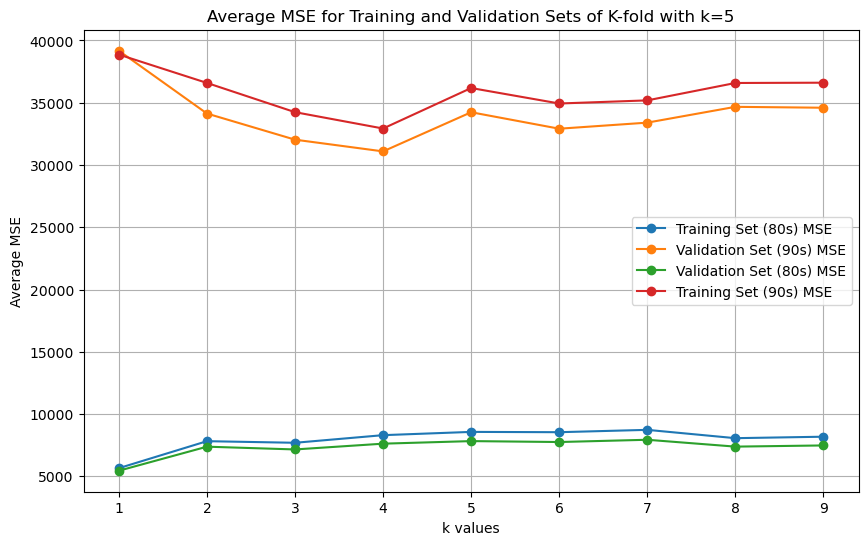

In [16]:
# Define the number of folds (k)
num_folds = 5
random_seed = 4

# Lists to store average MSE values for training and validation sets
avg_mse_80_train_list = []
avg_mse_90_val_list = []
avg_mse_80_val_list = []
avg_mse_90_train_list = []

# Loop over different values of k
for k in range(1, 10):
    MSE_80_train = 0  # Initialize training error variables
    MSE_90_train = 0
    MAE_80_train = 0
    MAE_90_train = 0
    
    MSE_80_val = 0    # Initialize validation error variables
    MSE_90_val = 0
    MAE_80_val = 0
    MAE_90_val = 0
    
    # Loop over folds
    for fold in range(num_folds):
        # Set seed for reproducibility
        np.random.seed(random_seed + fold)

        # Shuffle indices for random splitting
        indices_80 = np.random.permutation(len(X80))
        indices_90 = np.random.permutation(len(X90))

        # Split data into folds manually for 80s
        fold_size_80 = len(X80) // num_folds
        for i in range(num_folds):
            start_idx = i * fold_size_80
            end_idx = (i + 1) * fold_size_80
            test_indices = indices_80[start_idx:end_idx]

            train_indices = np.concatenate([indices_80[:start_idx], indices_80[end_idx:]])

            X_train, X_test = X80.iloc[train_indices], X80.iloc[test_indices]
            y_train, y_test = y80.iloc[train_indices], y80.iloc[test_indices]

            knn = DF80.apply(lambda x: get_knn_rent_prediction(DF80, x, k), axis=1)
            knn = knn.iloc[test_indices]
            MSE_80_val += mean_square_error(y_test, knn)  # Accumulate validation error
            MAE_80_val += mean_absolute_error(y_test, knn)

            knn = DF80.apply(lambda x: get_knn_rent_prediction(DF80, x, k), axis=1)
            knn = knn.iloc[train_indices]
            MSE_80_train += mean_square_error(y_train, knn)  # Accumulate training error
            MAE_80_train += mean_absolute_error(y_train, knn)

        # Split data into folds manually for 90s
        fold_size_90 = len(X90) // num_folds
        for i in range(num_folds):
            start_idx = i * fold_size_90
            end_idx = (i + 1) * fold_size_90
            test_indices = indices_90[start_idx:end_idx]

            train_indices = np.concatenate([indices_90[:start_idx], indices_90[end_idx:]])

            X_train, X_test = X90.iloc[train_indices], X90.iloc[test_indices]
            y_train, y_test = y90.iloc[train_indices], y90.iloc[test_indices]

            knn = DF90.apply(lambda x: get_knn_rent_prediction(DF90, x, k), axis=1)
            knn = knn.iloc[test_indices]
            MSE_90_val += mean_square_error(y_test, knn)  # Accumulate validation error
            MAE_90_val += mean_absolute_error(y_test, knn)

            knn = DF90.apply(lambda x: get_knn_rent_prediction(DF90, x, k), axis=1)
            knn = knn.iloc[train_indices]
            MSE_90_train += mean_square_error(y_train, knn)  # Accumulate training error
            MAE_90_train += mean_absolute_error(y_train, knn)

    # Calculate average MSE and MAE for training and validation
    avg_MSE_80s_train = MSE_80_train / num_folds
    avg_MSE_90s_train = MSE_90_train / num_folds
    avg_MAE_80s_train = MAE_80_train / num_folds
    avg_MAE_90s_train = MAE_90_train / num_folds

    avg_MSE_80s_val = MSE_80_val / num_folds
    avg_MSE_90s_val = MSE_90_val / num_folds
    avg_MAE_80s_val = MAE_80_val / num_folds
    avg_MAE_90s_val = MAE_90_val / num_folds

    # Append results to lists
    avg_mse_80_train_list.append(avg_MSE_80s_train)
    avg_mse_90_val_list.append(avg_MSE_90s_val)
    avg_mse_80_val_list.append(avg_MSE_80s_val)
    avg_mse_90_train_list.append(avg_MSE_90s_train)

    # Print results
    print(f"For k = {k}")
    print("Training Set:")
    print(f"Average MSE for 80s: {avg_MSE_80s_train}")
    print(f"Average MSE for 90s: {avg_MSE_90s_train}")
    print(f"Average MAE for 80s: {avg_MAE_80s_train}")
    print(f"Average MAE for 90s: {avg_MAE_90s_train}")

    print("Validation Set:")
    print(f"Average MSE for 80s: {avg_MSE_80s_val}")
    print(f"Average MSE for 90s: {avg_MSE_90s_val}")
    print(f"Average MAE for 80s: {avg_MAE_80s_val}")
    print(f"Average MAE for 90s: {avg_MAE_90s_val}")

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), avg_mse_80_train_list, marker='o', label='Training Set (80s) MSE')
plt.plot(range(1, 10), avg_mse_90_val_list, marker='o', label='Validation Set (90s) MSE')
plt.plot(range(1, 10), avg_mse_80_val_list, marker='o', label='Validation Set (80s) MSE')
plt.plot(range(1, 10), avg_mse_90_train_list, marker='o', label='Training Set (90s) MSE')

plt.title('Average MSE for Training and Validation Sets of K-fold with k=5')
plt.xlabel('k values')
plt.ylabel('Average MSE')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
k_values = np.arange(1, 10)

# Perform LOOCV for each k
for k in k_values:
    MSE_80_train = 0
    MSE_90_train = 0
    MAE_80_train = 0
    MAE_90_train = 0

    MSE_80_val = 0
    MSE_90_val = 0
    MAE_80_val = 0
    MAE_90_val = 0

    # Perform LOOCV for 80 in training set
    for i in range(len(X80)):
        X_train = X80.iloc[np.arange(len(X80)) != i]
        y_train = y80.iloc[np.arange(len(y80)) != i]

        knn = DF80.apply(lambda x: get_knn_rent_prediction(DF80, x, k), axis=1)
        knn_train = knn.iloc[np.arange(len(knn)) != i]
        knn_val = knn.iloc[i]

        MSE_80_train += mean_square_error(y_train, knn_train)
        MAE_80_train += mean_absolute_error(y_train, knn_train)

        MSE_80_val += mean_square_error(y80.iloc[i], knn_val)
        MAE_80_val += mean_absolute_error(y80.iloc[i], knn_val)

    # Perform LOOCV for 90 in training set
    for i in range(len(X90)):
        X_train = X90.iloc[np.arange(len(X90)) != i]
        y_train = y90.iloc[np.arange(len(y90)) != i]

        knn = DF90.apply(lambda x: get_knn_rent_prediction(DF90, x, k), axis=1)
        knn_train = knn.iloc[np.arange(len(knn)) != i]
        knn_val = knn.iloc[i]

        MSE_90_train += mean_square_error(y_train, knn_train)
        MAE_90_train += mean_absolute_error(y_train, knn_train)

        MSE_90_val += mean_square_error(y90.iloc[i], knn_val)
        MAE_90_val += mean_absolute_error(y90.iloc[i], knn_val)

    # Calculate average MSE and MAE for training and validation
    avg_MSE_80s_train = MSE_80_train / len(X80)
    avg_MSE_90s_train = MSE_90_train / len(X90)
    avg_MAE_80s_train = MAE_80_train / len(X80)
    avg_MAE_90s_train = MAE_90_train / len(X90)

    avg_MSE_80s_val = MSE_80_val / len(X80)
    avg_MSE_90s_val = MSE_90_val / len(X90)
    avg_MAE_80s_val = MAE_80_val / len(X80)
    avg_MAE_90s_val = MAE_90_val / len(X90)

    # Print results
    print(f"For k = {k}")
    print("Training Set:")
    print(f"  Average MSE for 80s: {avg_MSE_80s_train}")
    print(f"  Average MSE for 90s: {avg_MSE_90s_train}")
    print(f"  Average MAE for 80s: {avg_MAE_80s_train}")
    print(f"  Average MAE for 90s: {avg_MAE_90s_train}")

    print("Validation Set:")
    print(f"  Average MSE for 80s: {avg_MSE_80s_val}")
    print(f"  Average MSE for 90s: {avg_MSE_90s_val}")
    print(f"  Average MAE for 80s: {avg_MAE_80s_val}")
    print(f"  Average MAE for 90s: {avg_MAE_90s_val}")
    print()


For k = 1
Training Set:
  Average MSE for 80s: 1123.3281249999998
  Average MSE for 90s: 7784.656249999999
  Average MAE for 80s: 22.515625000000007
  Average MAE for 90s: 56.5
Validation Set:
  Average MSE for 80s: 1123.328125
  Average MSE for 90s: 7784.65625
  Average MAE for 80s: 22.515625
  Average MAE for 90s: 56.5

For k = 2
Training Set:
  Average MSE for 80s: 1547.8828125000005
  Average MSE for 90s: 7225.515624999999
  Average MAE for 80s: 24.156249999999996
  Average MAE for 90s: 55.453125000000014
Validation Set:
  Average MSE for 80s: 1547.8828125
  Average MSE for 90s: 7225.515625
  Average MAE for 80s: 24.15625
  Average MAE for 90s: 55.453125

For k = 3
Training Set:
  Average MSE for 80s: 1518.6302083333326
  Average MSE for 90s: 6765.3680555555575
  Average MAE for 80s: 23.796874999999993
  Average MAE for 90s: 52.822916666666664
Validation Set:
  Average MSE for 80s: 1518.6302083333323
  Average MSE for 90s: 6765.368055555556
  Average MAE for 80s: 23.796875000000007

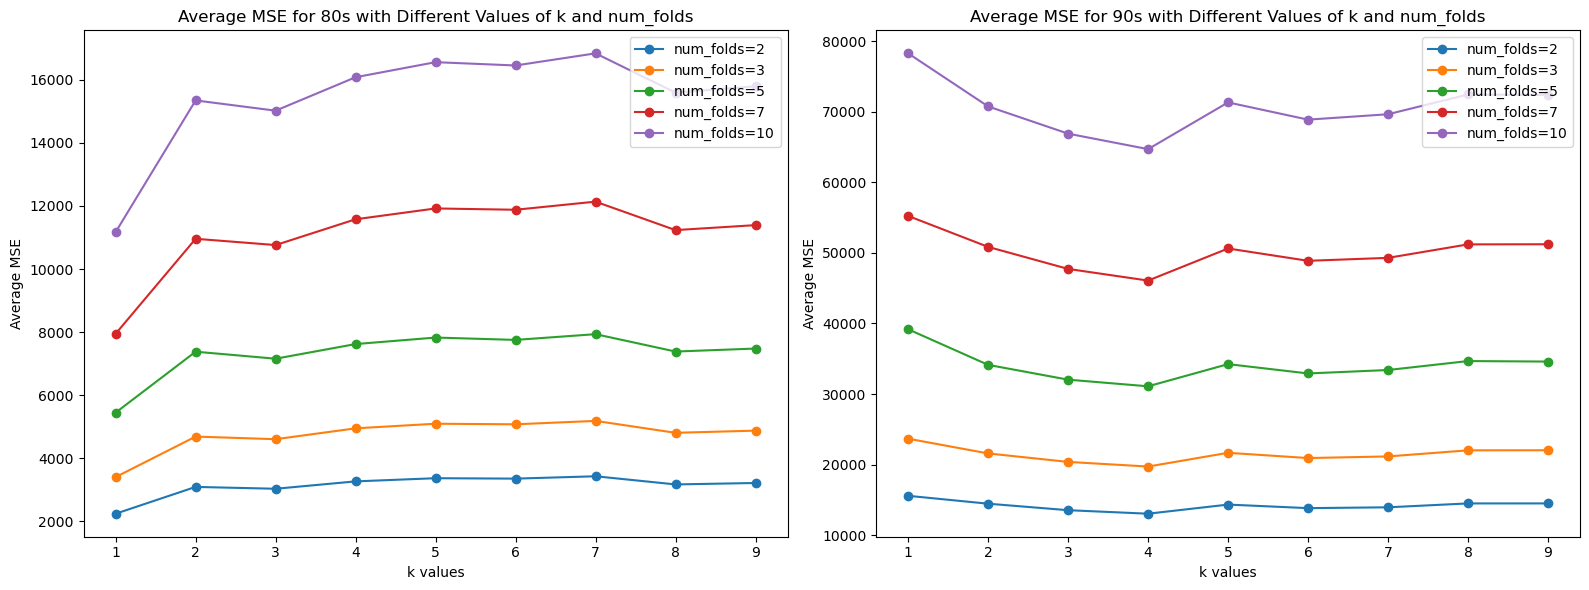

In [18]:
# Define the range of number of folds
num_folds_range = [2, 3, 5, 7, 10]

# Create subplots for 80s and 90s
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Loop over different values of num_folds
for num_folds in num_folds_range:
    avg_mse_80s_list = []
    avg_mse_90s_list = []

    for k in range(1, 10):
        MSE_80 = 0
        MSE_90 = 0

        for fold in range(num_folds):
            # Set seed for reproducibility
            np.random.seed(random_seed + fold)

            # Shuffle indices for random splitting
            indices_80 = np.random.permutation(len(X80))
            indices_90 = np.random.permutation(len(X90))

            # Split data into folds manually for 80s
            fold_size_80 = len(X80) // num_folds
            for i in range(num_folds):
                start_idx = i * fold_size_80
                end_idx = (i + 1) * fold_size_80
                test_indices = indices_80[start_idx:end_idx]

                train_indices = np.concatenate([indices_80[:start_idx], indices_80[end_idx:]])

                X_train, X_test = X80.iloc[train_indices], X80.iloc[test_indices]
                y_train, y_test = y80.iloc[train_indices], y80.iloc[test_indices]

                knn = DF80.apply(lambda x: get_knn_rent_prediction(DF80, x, k), axis=1)
                knn = knn.iloc[test_indices]
                MSE_80 += mean_square_error(y_test, knn)

            # Split data into folds manually for 90s
            fold_size_90 = len(X90) // num_folds
            for i in range(num_folds):
                start_idx = i * fold_size_90
                end_idx = (i + 1) * fold_size_90
                test_indices = indices_90[start_idx:end_idx]

                train_indices = np.concatenate([indices_90[:start_idx], indices_90[end_idx:]])

                X_train, X_test = X90.iloc[train_indices], X90.iloc[test_indices]
                y_train, y_test = y90.iloc[train_indices], y90.iloc[test_indices]

                knn = DF90.apply(lambda x: get_knn_rent_prediction(DF90, x, k), axis=1)
                knn = knn.iloc[test_indices]
                MSE_90 += mean_square_error(y_test, knn)

        # Calculate average MSE for 80s and 90s
        avg_MSE_80s = MSE_80 / num_folds
        avg_MSE_90s = MSE_90 / num_folds

        # Append results to lists
        avg_mse_80s_list.append(avg_MSE_80s)
        avg_mse_90s_list.append(avg_MSE_90s)

    # Plotting the graph for the current num_folds
    axs[0].plot(range(1, 10), avg_mse_80s_list, marker='o', label=f'num_folds={num_folds}')
    axs[1].plot(range(1, 10), avg_mse_90s_list, marker='o', label=f'num_folds={num_folds}')

# Set titles and labels
axs[0].set_title('Average MSE for 80s with Different Values of k and num_folds')
axs[0].set_xlabel('k values')
axs[0].set_ylabel('Average MSE')
axs[0].legend(loc='upper right')

axs[1].set_title('Average MSE for 90s with Different Values of k and num_folds')
axs[1].set_xlabel('k values')
axs[1].set_ylabel('Average MSE')
axs[1].legend(loc='upper right')

# Displaying the graphs
plt.tight_layout()
plt.show()